# NFL Big Data Bowl

This project contains the analysis of the aspects that make a run play successful, and a model that can predict the yards that will be gained on the next run play. All of the data used can be found [here](https://www.kaggle.com/c/nfl-big-data-bowl-2020/overview) <br> <br>
#### The aims:
1. *To utilise statistical analysis in order to provide a better understanding of what contributes to a successful run play.*
2. *To build a model that will predict the yards gained by the next run play.*

#### Why this matters:
1. *NFL teams are franchises, and winning teams can generate more profits*

    NFL teams are franchises. Because of this, like any other franchise or business, the bottom line often comes down to its profits and the annual increase of those profits. The National Football League split their revenue into two categories: 'national revenue' and 'local revenue'. The national revenue, consists of the profits made by the NFL by way of licensing and merchandising deals. These profits are then evenly distributed among each of the 32 NFL teams. <br>
    
    Conversely, the local revenue generated from ticket sales, corporate sponsors and concessions are earned by the teams themselves. According to an [article](https://www.forbes.com/sites/robreischel/2018/07/16/green-bay-packers-enjoy-another-year-of-record-revenue/#4347ecae14bb) on Forbes Business, in 2018 the Green Bay Packers *"local revenue increased to 199 million dollars"* accounting for around ***44%*** of their total revenue that year. Teams that generate more of a fan following, and in turn a larger scope of influence will have more bargaining power for these streams of local revenue. In addition to the potential profits from winning the playoffs and becoming the league champions, a winning team stands more chance of a greater fan following and thus greater potential for an increase in profit margins.

2. *A dominant run game can win games*

    To win you need to score, to score you need to get the ball into the end zone, and to get the ball into the end zone you need to move the ball farther up the field. With a run play being one out of the two options an offence has to try and move closer to the end zone, optimising this aspect of their game could lead to considerable improvements in a teams win percentage. In an [article](https://www.nfl.com/news/running-the-football-still-works-plus-the-amari-cooper-effect-0ap3000000996948) by the renowned NFL analyst, former player and scout, Bucky Brooks states that: <br>
    *“From Weeks 11-13, teams that ranked in the top half of the NFL in terms of run-play percentage posted a combined record of 32-13 (71.1 winning percentage). On the flip side, teams that ranked in the bottom half of the league in this category logged a combined mark of 12-31 (27.9)”* <br>

    In this project I have provided insightful analysis into the aspects of a successful run game and designed a model that will predict the yards gained on the next run play. The implementation of such a model is expected to improve the play calling efficiency of an offensive team and as a result lead to an increased win percentage. 

> For more literature on this see: <br>
Business Opportunities' - [It’s True: NFL Teams Really Are Franchises](https://www.business-opportunities.biz/2013/10/20/nfl-teams-are-franchises-too/) <br>
CNBC's  - [How NFL Teams Make money](https://www.cnbc.com/2018/10/05/nfl-owners-teams-football.html) <br> <br>
And for a beginner's guide to the sport: <br>
The NFL's - [A Beginner's Guide to American Football](https://www.youtube.com/watch?v=3t6hM5tRlfA)

---

## Notebook Setup

In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [652]:
df = pd.read_csv("data/nfl-big-data-bowl-2020/train.csv") 

#### Initial data exploration

In [653]:
df.shape # checking the size of the dataframe

(682154, 49)

In [654]:
pd.DataFrame(df.keys())

,0
0,GameId
1,PlayId
2,Team
3,X
4,Y
5,S
6,A
7,Dis
8,Orientation
9,Dir


In [376]:
#overview of the data types and null values
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682154 entries, 0 to 682153
Data columns (total 49 columns):
GameId                    682154 non-null int64
PlayId                    682154 non-null int64
Team                      682154 non-null object
X                         682154 non-null float64
Y                         682154 non-null float64
S                         682154 non-null float64
A                         682154 non-null float64
Dis                       682154 non-null float64
Orientation               682131 non-null float64
Dir                       682126 non-null float64
NflId                     682154 non-null int64
DisplayName               682154 non-null object
JerseyNumber              682154 non-null int64
Season                    682154 non-null int64
YardLine                  682154 non-null int64
Quarter                   682154 non-null int64
GameClock                 682154 non-null object
PossessionTeam            682154 non-null object
Down   

In [377]:
df.describe() # statistical overview of the data

,GameId,PlayId,X,Y,S,A,Dis,Orientation,Dir,NflId,...,Distance,HomeScoreBeforePlay,VisitorScoreBeforePlay,NflIdRusher,DefendersInTheBox,Yards,PlayerWeight,Week,Temperature,Humidity
count,6.821540e+05,6.821540e+05,682154.000000,682154.000000,682154.000000,682154.000000,682154.000000,682131.000000,682126.000000,6.821540e+05,...,682154.000000,682154.000000,682154.000000,6.821540e+05,682132.000000,682154.000000,682154.000000,682154.000000,618508.000000,675994.000000
mean,2.017975e+09,2.017975e+13,60.036863,26.791456,2.634598,1.701739,0.278193,179.996742,180.040620,2.369743e+06,...,8.319154,11.047989,9.762570,2.446079e+06,6.910340,4.227626,253.414628,8.401587,62.010066,54.741563
std,7.844593e+05,7.844593e+09,25.499310,7.192919,1.404773,0.991380,0.145218,102.794554,106.189491,6.053648e+05,...,3.818716,10.095556,9.532945,4.833287e+05,0.985065,6.449866,48.469869,4.808791,17.071117,25.146693
min,2.017091e+09,2.017091e+13,0.660000,1.850000,0.000000,0.000000,0.000000,0.000000,0.000000,2.220000e+02,...,1.000000,0.000000,0.000000,2.340000e+02,2.000000,-15.000000,153.000000,1.000000,9.000000,0.000000
25%,2.017113e+09,2.017113e+13,39.080000,22.760000,1.520000,0.950000,0.160000,90.060000,90.150000,2.532989e+06,...,6.000000,3.000000,0.000000,2.540269e+06,6.000000,1.000000,210.000000,4.000000,50.000000,43.000000
50%,2.018101e+09,2.018101e+13,60.230000,26.800000,2.510000,1.550000,0.270000,179.640000,180.180000,2.550541e+06,...,10.000000,10.000000,7.000000,2.555224e+06,7.000000,3.000000,245.000000,8.000000,64.000000,59.000000
75%,2.019091e+09,2.019091e+13,80.990000,30.850000,3.620000,2.310000,0.390000,269.780000,270.260000,2.556445e+06,...,10.000000,17.000000,16.000000,2.558116e+06,7.000000,6.000000,305.000000,12.000000,75.000000,71.000000
max,2.019112e+09,2.019113e+13,117.650000,56.450000,9.410000,14.710000,1.390000,360.000000,360.000000,2.563364e+06,...,40.000000,57.000000,59.000000,2.563327e+06,11.000000,99.000000,380.000000,17.000000,97.000000,100.000000


In [378]:
# Checking the lowest and highest distance travelled by a rusher
# A distance of -15 yrds means that the rusher lost yards by moving in the opposite direction. Usually forced by a defender

print(f"Lowest number of yards gained by a run: {df['Yards'].unique().min()}", "\n", 
      f"Highest number of yards gained by a run: {df['Yards'].unique().max()}")

Lowest number of yards gained by a run: -15 
 Highest number of yards gained by a run: 99


In [379]:
df.isnull().sum() # checking for null values

GameId                         0
PlayId                         0
Team                           0
X                              0
Y                              0
S                              0
A                              0
Dis                            0
Orientation                   23
Dir                           28
NflId                          0
DisplayName                    0
JerseyNumber                   0
Season                         0
YardLine                       0
Quarter                        0
GameClock                      0
PossessionTeam                 0
Down                           0
Distance                       0
FieldPosition               8602
HomeScoreBeforePlay            0
VisitorScoreBeforePlay         0
NflIdRusher                    0
OffenseFormation              88
OffensePersonnel               0
DefendersInTheBox             22
DefensePersonnel               0
PlayDirection                  0
TimeHandoff                    0
TimeSnap  

In [380]:
#counting the number of players in the dataset and the number of rushers
 

print(f"Number of players: {df['NflId'].nunique()}", "\n", 
      f"Number of rushers: {df['NflIdRusher'].nunique()}")

Number of players: 2570 
 Number of rushers: 443


#### Some thoughts on the initial data exploration:
- There are several features that have null values. These will be cleaned as I go along if I decide to or need to use that particular feature in my anaylsis or model. Otherwise it will be left as is.
- The minimum number of yards rushed for on a play is -15 yards. I imagine this is a rare occurance as offensive teams do everything in their power to make sure that yards are gained and not lost. To the point that a crucial aspect of the technique taught to anyone who runs with the ball is to lean forward as you fall so that even on your way down to the ground you still gain a few inches. Negative yards is a taboo in the sport. The only acceptable and encouraged exception is when looking at Quarter Backs. Because of their importance on the team it is usually deemed better that the QB stays away from defenders and stays safe as a result, even if it means giving up a chance for a gain in yardage. A QB 'running away' from a defensive player could explain for the loss of 15 yards on that particular play. *See [ESPN's artcile](https://www.espn.com/nfl/story/_/id/10007640/nfl-overprotects-quarterbacks-good-reason) on 'Overprotected Quarter Backs'*
- The 'DefendersInTheBox' feature has some missing values. I assume this is because some defensive formations are harder to define especially as defenders, unlike their offensive opponents, are free to move around as they please before the snap of the ball. So defenders that start in the box may not have remained in the box and vice versa.
- In addition an 'OffenseInTheBox' feature could be useful in analysis and as a predictor.
<br> <br>

## Data Cleaning & Feature Engineering

In [667]:
# converting 'PlayerHeight' from string type of "feet-inches" to int type of inches

"""
Input: will take in a string in the format of 'feet-inches' 
Output: return an int type of the total number of inches
"""
def inches_as_int(string):
    value = string.split('-') #split the two numbers into seperat string values
    value = int(value[0])*12 + int(value[1])  # multiply the first number by 12 as there are 12 inches in a foot and add
    return value                              # the 2nd number remaining for the total 



df['PlayerHeight'] = df['PlayerHeight'].apply(inches_as_int)

In [668]:
# changing null values in offensive formation to 'UNKNOWN'

df['OffenseFormation'].fillna("UNKNOWN", inplace=True)

In [669]:
df['Position'].unique()

array(['SS', 'DE', 'ILB', 'FS', 'CB', 'DT', 'WR', 'TE', 'T', 'QB', 'RB',
       'G', 'C', 'OLB', 'NT', 'FB', 'MLB', 'LB', 'OT', 'S', 'OG', 'HB',
       'DB', 'DL', 'SAF'], dtype=object)

In [670]:
# Engineering a 'Team' feature that states whether or not the player is on the "Defence" or "Offence" side of the team
# Not to be confused with the 'HomeTeamAbbr' or 'AwayTeamAbbr' that states the actual team's name

defensive_positions = ['SS', 'DE', 'ILB', 'FS', 'CB', 'DT', 'OLB', 'NT', 'FB', 'MLB', 'LB', 'S', 'DB', 'DL', 'SAF']
offensive_positions = ['WR', 'TE', 'T', 'QB', 'RB', 'G', 'C', 'OT', 'OG', 'HB']

df['TeamSide'] = ["OFFENCE" if x in offensive_positions else "DEFENCE" for x in df['Position']]

In [671]:
# Engineering a feature that states "YES" or "NO" depending on whether the player is the rusher in that play or not 

rusher_tuple = zip(df['NflId'], df['NflIdRusher'])
df['IsRusher'] = ["YES" if x == y else "NO" for x,y in rusher_tuple]

## Exploratory Analysis

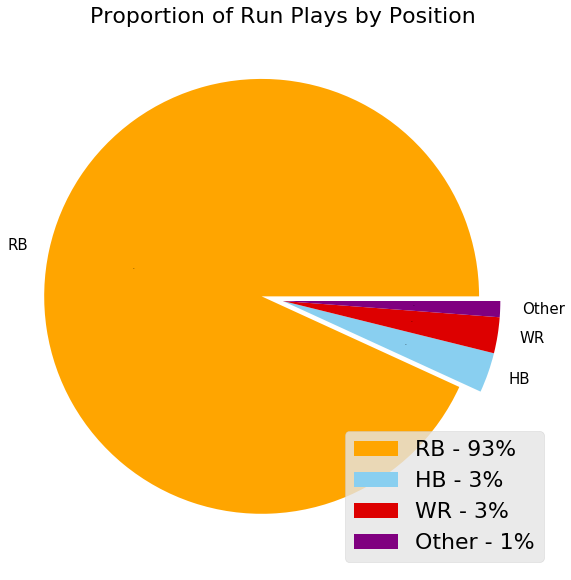

In [697]:
# Creating a pie chart to demonstrate the positions that are most responsible for the run game 

# lists of all the player positions that ran with the ball and the number of times each position did so
rushing_positions = list(df.loc[(df['IsRusher'] == "YES")]['Position'].value_counts().keys())
num_of_runplays = list(df.loc[(df['IsRusher'] == "YES")]['Position'].value_counts())
pos_num = list(zip(rushing_positions, num_of_runplays))

# adding the positions that were responsible for less than 800 of the total runs in the dataset to an 'other' category
sum_list = []
for pos, num in pos_num:
    if num < 800:
        sum_list.append(num)
        num_of_runplays.remove(num)
        rushing_positions.remove(pos)
    else:
        pass
    
rushing_positions.append("Other")
num_of_runplays.append(sum(sum_list))


# plotting the pie chart
fig = plt.figure(figsize=(10,10))
colours = ['#ffa500', '#89cff0', '#DD0000', '#800080']
explode = (0.1, 0, 0, 0)

patches, texts, autotexts = plt.pie(num_of_runplays, labels=rushing_positions, colors=colours,
                                    explode=explode, autopct='%1.0f%%')

# setting the font size of the labels on the pie chart itself
for text in texts:
    text.set_fontsize(15)

# removing the percentage labels from the pie chart itself 
for autotext in autotexts:
    autotext.set_fontsize(0)
    
# creating a list of labels for the legend that will state "the groups label - the percentage of it's proportion"    
perc_list = []
for autotext in autotexts:
    perc_list.append(str(autotext)[-5:-2].strip(" '' "))
    
labels_perc = zip(rushing_positions, perc_list)
legend_labels = []
for pair in labels_perc:
    legend_labels.append(pair[0] + " - " + pair[1])
        
# final aesthetic settings
plt.title("Proportion of Run Plays by Position", fontsize=22)    
plt.legend(loc=4, fontsize=22, labels=legend_labels)   
plt.show;

#### Visualisation Analysis:
We can see here that almost all of the runs in the dataset are by the Running Backs on the offense, contributing to 93% of the total run plays. It could be argued that this should be rounded to 96% as the HB (Half Back) position is a specific type of running back. <br>

This to be expected as running with the ball (as the name suggests) is the RB's primary role on the team. Because of this the modelling of the data will be based on the cases where it is the RB who is running with the ball and any other player who ran with the ball will be treated as an edge case.
<br> <br>

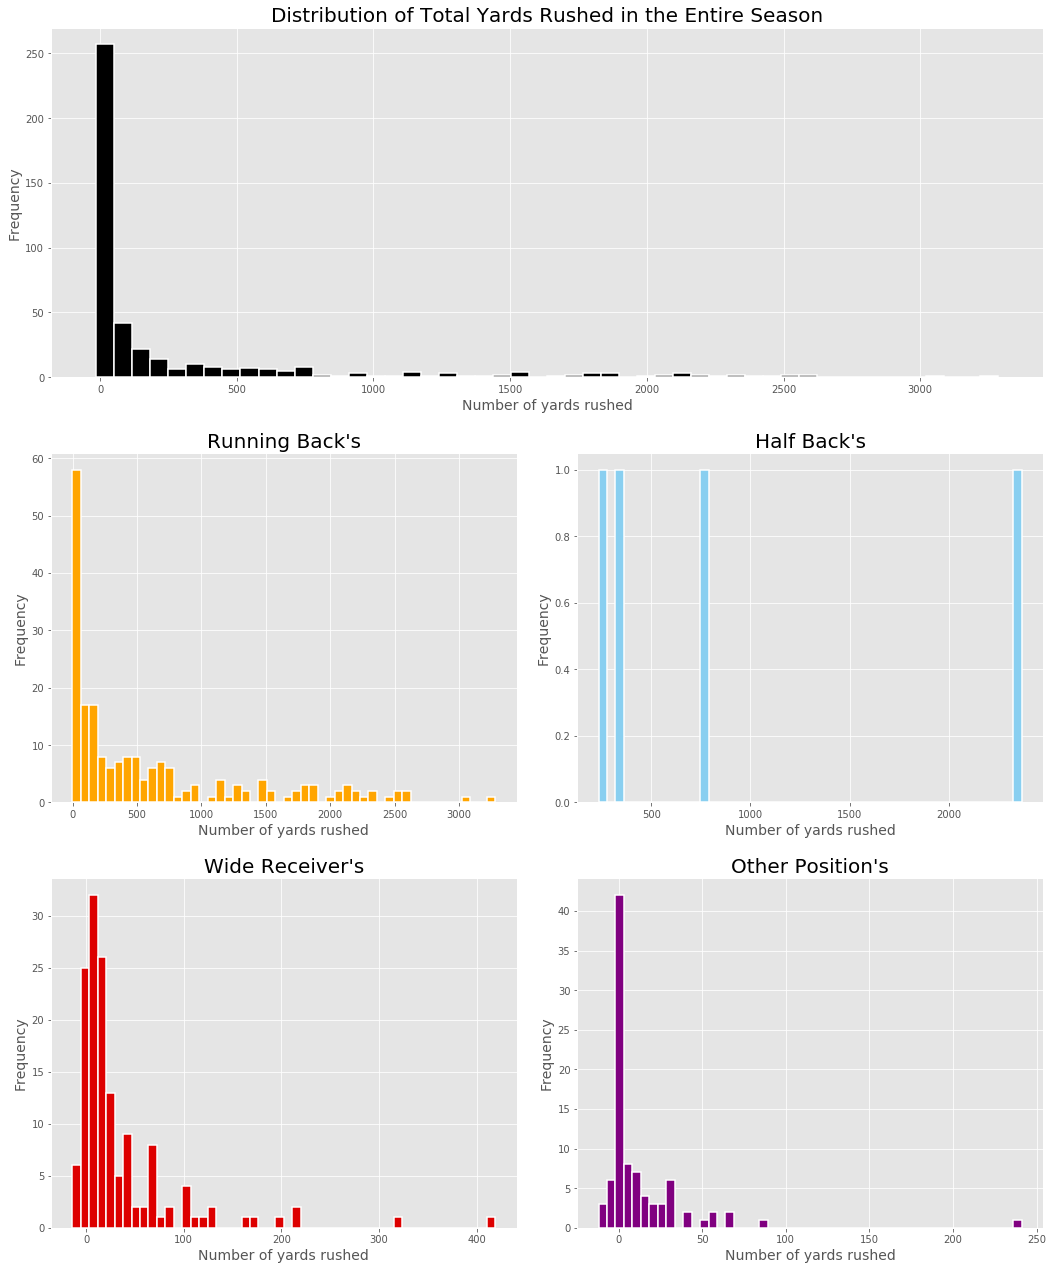

In [672]:
# Asthetic values for the figure
plt.style.use('ggplot')
fig = plt.figure(figsize=(15,18))

# total distribution of run plays in the dataset
all_rushers_total = df.loc[df['IsRusher'] == "YES"]
all_rushers_total = all_rushers_total.groupby('NflId').sum()['Yards']

# aesthetic values for the plot
fig.add_subplot(3,2, (1,2))
plt.title('Distribution of Total Yards Rushed in the Entire Season', fontsize=20)
plt.xlabel('Number of yards rushed', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

plt.hist(all_rushers_total, bins=50, color='black', edgecolor='white', linewidth=1.5)

        
        
# running back distribution
rb_total = df.loc[(df['IsRusher'] == "YES") & (df['Position'] == "RB")]
rb_total = rb_total.loc[:, ['NflId', 'Yards']].groupby('NflId').sum()['Yards']

# aesthetic values for the plot
fig.add_subplot(3,2,3)
plt.title('Running Back\'s', fontsize=20)
plt.xlabel('Number of yards rushed', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

plt.hist(rb_total, bins=50, color='#ffa500', edgecolor='white', linewidth=1.5)



# Half back distribution
hb_total = df.loc[(df['IsRusher'] == "YES") & (df['Position'] == "HB")]
hb_total = hb_total.loc[:, ['NflId', 'Yards']].groupby('NflId').sum()['Yards']

# aesthetic values for the plot
fig.add_subplot(3,2,4)
plt.title('Half Back\'s', fontsize=20)
plt.xlabel('Number of yards rushed', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

plt.hist(hb_total, bins=50, color='#89cff0', edgecolor='white', linewidth=1.5)



# Wide Receiver distribution
wr_total = df.loc[(df['IsRusher'] == "YES") & (df['Position'] == "WR")]
wr_total = wr_total.loc[:, ['NflId', 'Yards']].groupby('NflId').sum()['Yards']

# aesthetic values for the plot
fig.add_subplot(3,2,5)
plt.title('Wide Receiver\'s', fontsize=20)
plt.xlabel('Number of yards rushed', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

plt.hist(wr_total, bins=50, color='#DD0000', edgecolor='white', linewidth=1.5)



# Other distribution
other_total = df.loc[(df['IsRusher'] == "YES") & ((df['Position'] == "FB")
                                               | (df['Position'] == "QB")
                                               | (df['Position'] == "TE")
                                               | (df['Position'] == "CB")
                                               | (df['Position'] == "DT")
                                               | (df['Position'] == "G")
                                               | (df['Position'] == "DE"))]

other_total = other_total.loc[:, ['NflId', 'Yards']].groupby('NflId').sum()['Yards']

# aesthetic values for the plot
fig.add_subplot(3,2,6)
plt.title('Other Position\'s', fontsize=20)
plt.xlabel('Number of yards rushed', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

plt.hist(other_total, bins=50, color='#800080', edgecolor='white', linewidth=1.5)


plt.tight_layout(pad=2)
plt.show();

#### Visualisation Analysis:
- The distribution of yards gained and lost by player position shows that in ***31/40*** of the cases where there had been a loss of yards, it was a WR (Wide Receiver) who had been running with the ball. Most likely, this is due to a defensive player penetrating a gap and tackling the WR in the backfield during an attempted 'Jet Sweep', 'End-Around' or 'Reverse' play. <br>
See [Windy-City-Gridiron's great article](https://www.windycitygridiron.com/2014/11/5/7132567/football-101-difference-between-a-jet-sweep-an-end-around-reverse) on this for an in-depth explanation on these three plays
- The distribution of Half Back's total season yards shows that there are only 4 players in the HB position. Even with this it is interesting to note that between these 4 players there are still 3,722 total yards gained in the season. compared to the WR's where there are 146 players who totalled 5,055 yards. On average each HB ran for ***943 yards*** that season and each WR ran for ***35 yards***. When you consider the HB
<br> <br>

In [508]:
# plot correlations with each dependent variable vs the independent variable
# check correlations between each of the variables themselves

rb_weights = rb_df.groupby('NflId')

,0,1
0,234,GameId PlayId Team ...
1,262,GameId PlayId Team ...
2,284,GameId PlayId Team ...
3,925,GameId PlayId Team ...
4,949,GameId PlayId Team ...
...,...,...
201,2562906,GameId PlayId Team ...
202,2563062,GameId PlayId Team ...
203,2563296,GameId PlayId Team ...
204,2563300,GameId PlayId Team ...


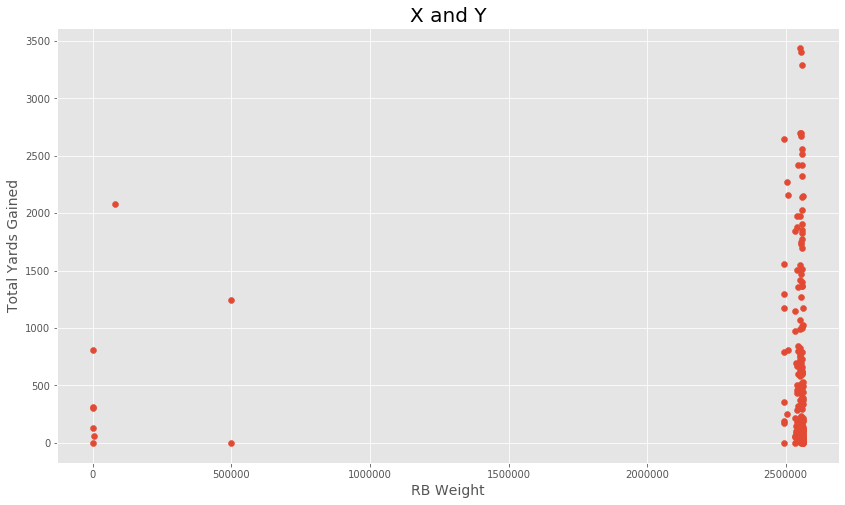

In [515]:
# plot a scatter plot of RB weight and yards

rb_df = df.loc[(df['IsRusher'] == "YES") & (df['Position'] == "RB")]
rb_weights = rb_df.groupby('NflId').get_groups()
rb_yards = rb_df.groupby('NflId').sum()['Yards']

# aesthetic values for the figure
plt.figure(figsize=(14,8))
plt.style.use('ggplot')
plt.title('X and Y', fontsize=20)
plt.xlabel('RB Weight', fontsize=14)
plt.ylabel('Total Yards Gained', fontsize=14)

plt.scatter(rb_weights, rb_yards);

In [516]:
rb_df.groupby('NflId')['PlayerWeight']

## Modelling

#### Data Prep for modelling

In [684]:
# seperating the dependent variables from the independent variable
X_train = df.drop('Yards', axis=1)
y_train = df['Yards']

In [690]:
# adding a constant to the input data
X_train = sm.add_constant(X_train)

In [691]:
# splitting the training data into a train and validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train)

In [692]:
# the baseline model will have 2 predictors
dependent_vars1 = X_train[['Distance', 'Down']]

# fitting the model to the data and checking the summary statistics
base_model = sm.OLS(y_train, dependent_vars1)
base_results = base_model.fit()
base_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Yards   R-squared (uncentered):                   0.298
Model:                            OLS   Adj. R-squared (uncentered):              0.298
Method:                 Least Squares   F-statistic:                          8.161e+04
Date:                Tue, 26 May 2020   Prob (F-statistic):                        0.00
Time:                        14:23:55   Log-Likelihood:                     -1.2589e+06
No. Observations:              383711   AIC:                                  2.518e+06
Df Residuals:                  383709   BIC:                                  2.518e+06
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Distance       0.2943      0.002    172.245      0.000       0.291       0.298
Down           1.0741      0.009    114.050      0.000       1.056       1.093
==============================================================================
Omnibus:                   346633.045   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         19153723.529
Skew:                           4.212   Prob(JB):                         0.00
Kurtosis:                      36.571   Cond. No.                         8.45
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Model Analysis:
- $R^2$ value:
- P values: 
- Coefficients:
- AIC: 
- Any other params I want to consider???
<br><br>
using an alpha of 0.05

#### Next Iteration:
Write my plans and reasoning for the next iteration here...
- check the varification inflation factors between the independent variables used
- standardise the variables

In [695]:
# the 2nd model will have ... predictors
dependent_vars2 = X_train[['Distance', 'Down', 'PlayerWeight']]

# fitting the model to the data and checking the summary statistics
model_2 = sm.OLS(y_train, dependent_vars2)
results_2 = model_2.fit()
results_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Yards   R-squared (uncentered):                   0.302
Model:                            OLS   Adj. R-squared (uncentered):              0.302
Method:                 Least Squares   F-statistic:                          5.540e+04
Date:                Tue, 26 May 2020   Prob (F-statistic):                        0.00
Time:                        14:27:25   Log-Likelihood:                     -1.2579e+06
No. Observations:              383711   AIC:                                  2.516e+06
Df Residuals:                  383708   BIC:                                  2.516e+06
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Distance         0.2055      0.003     79.485      0.000       0.200       0.211
Down             0.5617      0.015     38.399      0.000       0.533       0.590
PlayerWeight     0.0063      0.000     45.675      0.000       0.006       0.007
==============================================================================
Omnibus:                   348871.408   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         19533102.017
Skew:                           4.253   Prob(JB):                         0.00
Kurtosis:                      36.903   Cond. No.                         365.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Conclusion